# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Farhan Jiratullah
- **Email:** farhanjiratullah794@gmail.com
- **ID Dicoding:** farhanjtl

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns  

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('data/day.csv')    # Data harian
df_hour = pd.read_csv('data/hour.csv')  # Data per jam

# Tampilkan beberapa baris pertama
print("Preview dataset harian:")
display(df_day.head())

print("\nPreview dataset per jam:")
display(df_hour.head())

Preview dataset harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview dataset per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1️⃣ Informasi Umum Dataset
Dataset ini terdiri dari dua file utama:  
- **day.csv**: Berisi data agregat harian tentang penyewaan sepeda.  
- **hour.csv**: Berisi data agregat per jam tentang penyewaan sepeda.  

Kedua dataset mencatat jumlah penyewaan sepeda serta faktor-faktor yang dapat mempengaruhinya, seperti cuaca, musim, dan hari kerja/libur.

---

## 2️⃣ Preview Dataset
**Contoh 5 baris pertama dari day.csv:**  
- Terdapat kolom `instant`, `dteday` (tanggal), `season`, `yr`, `mnth`, dan faktor cuaca seperti `temp`, `atemp`, `hum`, dan `windspeed`.
- Data penyewaan sepeda tercatat dalam kolom `casual`, `registered`, dan `cnt` (total penyewaan).  

**Contoh 5 baris pertama dari hour.csv:**  
- Mirip dengan `day.csv`, tetapi memiliki tambahan kolom `hr` yang merepresentasikan jam dalam sehari (0-23).
- Lebih granular dalam mencatat pola penggunaan sepeda berdasarkan jam.

---

## 3️⃣ Insight Awal dari Data
1. **Jumlah penyewaan sepeda cenderung dipengaruhi oleh faktor cuaca**, seperti `weathersit`, `temp`, `hum`, dan `windspeed`.  
2. **Terdapat perbedaan pola penggunaan antara pengguna casual dan registered**, yang dapat dianalisis lebih lanjut.  
3. **Kolom `season` dan `mnth` memungkinkan kita melihat pola musiman dalam penyewaan sepeda** (misalnya, apakah musim panas lebih banyak peminjaman?).  
4. **Kolom `workingday` dan `holiday` dapat digunakan untuk melihat apakah penyewaan lebih banyak pada hari kerja atau akhir pekan/libur**.  
5. **Dataset `hour.csv` memberikan gambaran lebih mendetail**, misalnya **jam-jam sibuk penyewaan sepeda**.


### Assessing Data

#### Menilai tabel `df_day`

In [3]:
print("Informasi dataset harian (day.csv):")
df_day.info()

Informasi dataset harian (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
print("Missing values di day.csv:")
print(df_day.isnull().sum())

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
print("Jumlah duplikasi di day.csv:", df_day.duplicated().sum())

Jumlah duplikasi di day.csv: 0


In [6]:
print("Statistik deskriptif dataset harian:")
display(df_day.describe())

Statistik deskriptif dataset harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `df_hour`

In [7]:
print("\nInformasi dataset per jam (hour.csv):")
df_hour.info()


Informasi dataset per jam (hour.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("\nMissing values di hour.csv:")
print(df_hour.isnull().sum())


Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
print("Jumlah duplikasi di hour.csv:", df_hour.duplicated().sum())

Jumlah duplikasi di hour.csv: 0


In [10]:
print("\nStatistik deskriptif dataset per jam:")
display(df_hour.describe())


Statistik deskriptif dataset per jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
print("Distribusi kategori pada dataset harian:")
for col in categorical_columns:
    print(f"{col}: {df_day[col].unique()}")

Distribusi kategori pada dataset harian:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


In [13]:
print("\nDistribusi kategori pada dataset per jam:")
for col in categorical_columns:
    if col in df_hour.columns:
        print(f"{col}: {df_hour[col].unique()}")


Distribusi kategori pada dataset per jam:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]


**Insight:**

## 1️⃣ Kualitas Data
- Tidak ditemukan **missing values** dalam dataset.
- Tidak ada **data duplikat**, sehingga dataset sudah bersih dalam hal redundansi data.
- Tidak ada **anomali yang mencolok**, seperti kategori yang tidak sesuai.
- Terdapat kesalahan tipe data untuk `dteday`, yang seharusnya memiliki tipe data 'date'.

---

## 2️⃣ Distribusi Data
- Dataset ini memiliki **data yang cukup seimbang** antar kategori seperti musim (`season`), hari (`weekday`), dan jam (`hr`).
- Namun, ada kemungkinan ketimpangan jumlah penyewaan berdasarkan **hari kerja vs akhir pekan**, yang perlu dianalisis lebih lanjut.

---

### Cleaning Data

In [14]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Cek kembali tipe data untuk memastikan perubahan
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Cek kembali tipe data untuk memastikan perubahan
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Kolom `dteday` awalnya bertipe **object (string)**, yang dapat menyulitkan analisis berbasis waktu.  
Konversi tipe data menjadi **datetime** akan memberikan manfaat berikut:
- Memudahkan **pengelompokan data** berdasarkan tahun, bulan, atau hari.
- Memungkinkan **analisis tren waktu**, seperti melihat pola penggunaan sepeda dari waktu ke waktu.
- Mempermudah perhitungan **interval waktu** jika dibutuhkan.

## Exploratory Data Analysis (EDA)

### Explore `df_day` & `df_hour` data

#### Bagaimana pola penggunaan sepeda berdasarkan musim?

In [16]:
season_usage = df_day.groupby("season").agg({'cnt': ["mean", "median", "sum", "count"]}).reset_index()

# Menampilkan hasil eksplorasi
season_usage

season          cnt                       
                 mean  median      sum count
0      1  2604.132597  2209.0   471348   181
1      2  4992.331522  4941.5   918589   184
2      3  5644.303191  5353.5  1061129   188
3      4  4728.162921  4634.5   841613   178

**Insight:**
- Musim gugur (Fall - 3) memiliki rata-rata penyewaan sepeda tertinggi, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.
- Musim semi (Spring - 1) cenderung memiliki jumlah penyewaan paling rendah, mungkin karena kondisi cuaca yang masih kurang ideal.
- Musim panas (Summer - 2) dan musim dingin (Winter - 4) memiliki pola penyewaan yang cukup stabil, tetapi bisa saja dipengaruhi oleh faktor lain seperti liburan atau kondisi jalan.

#### Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

In [17]:
weather_usage = df_day.groupby("weathersit").agg({'cnt': ["mean", "median", "sum", "count"]}).reset_index()

# Menampilkan hasil eksplorasi
weather_usage

weathersit          cnt                       
                     mean  median      sum count
0          1  4876.786177  4844.0  2257952   463
1          2  4035.862348  4040.0   996858   247
2          3  1803.285714  1817.0    37869    21

**Insight:**
- Cuaca cerah atau berawan ringan (weathersit = 1) memiliki jumlah penyewaan sepeda tertinggi, karena kondisi ini lebih nyaman untuk bersepeda.
- Cuaca berkabut atau mendung (weathersit = 2) menunjukkan sedikit penurunan dalam jumlah penyewaan sepeda, kemungkinan karena visibilitas yang berkurang atau kelembapan yang lebih tinggi.
- Cuaca hujan ringan atau salju ringan (weathersit = 3) menyebabkan penurunan signifikan dalam penyewaan sepeda, yang masuk akal karena bersepeda dalam kondisi ini lebih sulit dan kurang nyaman.
- Cuaca ekstrem seperti hujan deras atau badai salju (weathersit = 4) tidak ada penyewaan sepeda sama sekali.

#### Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?

In [18]:
hourly_usage = df_hour.groupby("hr").agg({'cnt': ["mean", "median", "sum", "count"]}).reset_index()

# Menampilkan hasil eksplorasi
hourly_usage

hr         cnt                     
              mean median     sum count
0    0   53.898072   40.0   39130   726
1    1   33.375691   20.0   24164   724
2    2   22.869930   11.0   16352   715
3    3   11.727403    6.0    8174   697
4    4    6.352941    6.0    4428   697
5    5   19.889819   19.0   14261   717
6    6   76.044138   76.0   55132   725
7    7  212.064649  208.0  154171   727
8    8  359.011004  385.0  261001   727
9    9  219.309491  216.0  159438   727
10  10  173.668501  147.0  126257   727
11  11  208.143054  180.0  151320   727
12  12  253.315934  229.0  184414   728
13  13  253.661180  224.0  184919   729
14  14  240.949246  212.0  175652   729
15  15  251.233196  227.0  183149   729
16  16  311.983562  304.5  227748   730
17  17  461.452055  475.0  336860   730
18  18  425.510989  418.5  309772   728
19  19  311.523352  309.5  226789   728
20  20  226.030220  223.5  164550   728
21  21  172.314560  173.5  125445   728
22  22  131.335165  129.0   95612   728
23  23   87.831044   80.0   63941   728

**Insight:**
- Jam sibuk (rush hour) memiliki jumlah penyewaan sepeda tertinggi. Biasanya terjadi pada:
  - Pagi hari (sekitar pukul 07:00 - 09:00) → Masyarakat menggunakan sepeda untuk pergi bekerja atau sekolah.
  - Sore hari (sekitar pukul 17:00 - 19:00) → Masyarakat pulang dari kerja atau sekolah.
- Penyewaan sepeda paling rendah terjadi pada dini hari (00:00 - 05:00) karena sebagian besar orang sedang tidur dan aktivitas bersepeda minim.
- Siang hingga sore hari (11:00 - 16:00) mungkin memiliki peningkatan penyewaan tetapi kemungkinan besar berasal dari wisatawan atau pengguna rekreasi, bukan pengguna komuter.

In [19]:
df_day["cnt_diff"] = df_day["cnt"].diff()

# Menghitung persentase perubahan
df_day["cnt_pct_change"] = df_day["cnt"].pct_change() * 100

# Menampilkan 5 data pertama setelah penambahan kolom
df_day[["dteday", "cnt", "cnt_diff", "cnt_pct_change"]].head()

,dteday,cnt,cnt_diff,cnt_pct_change
0,2011-01-01,985,NaN,NaN
1,2011-01-02,801,-184.0,-18.680203
2,2011-01-03,1349,548.0,68.414482
3,2011-01-04,1562,213.0,15.789474
4,2011-01-05,1600,38.0,2.432778


In [20]:
lonjakan_terbesar = df_day.sort_values(by="cnt_pct_change", ascending=False)

# Menampilkan hasil
lonjakan_terbesar[["dteday", "cnt", "cnt_diff", "cnt_pct_change"]].head()

,dteday,cnt,cnt_diff,cnt_pct_change
668,2012-10-30,1096,1074.0,4881.818182
302,2011-10-30,3331,2704.0,431.259968
669,2012-10-31,5566,4470.0,407.846715
726,2012-12-27,2114,1673.0,379.365079
341,2011-12-08,3322,2617.0,371.205674


In [21]:
threshold = 30

# Menemukan tanggal terakhir dengan lonjakan signifikan
lonjakan_terakhir = df_day[df_day["cnt_pct_change"] > threshold].sort_values(by="dteday", ascending=False)

# Menampilkan hasil
lonjakan_terakhir[["dteday", "cnt", "cnt_diff", "cnt_pct_change"]].head()

,dteday,cnt,cnt_diff,cnt_pct_change
730,2012-12-31,2729,933.0,51.948775
729,2012-12-30,1796,455.0,33.929903
727,2012-12-28,3095,981.0,46.404920
726,2012-12-27,2114,1673.0,379.365079
709,2012-12-10,5170,1942.0,60.161090


**Insight:**
- Lonjakan terbesar terjadi pada 2012-10-30, dengan peningkatan sebesar 4881% dibandingkan hari sebelumnya.
- Lonjakan signifikan terakhir (di atas 30%) terjadi pada 2012-12-31, dengan kenaikan 51%.
- Lonjakan ini bisa disebabkan oleh faktor seperti perubahan cuaca, akhir pekan, atau hari libur tertentu yang meningkatkan permintaan sepeda.

In [22]:
df_day["year_month"] = df_day["dteday"].dt.to_period("M")

# Menghitung jumlah penyewaan sepeda per bulan
monthly_rentals = df_day.groupby("year_month").agg({'cnt': ['sum']}).reset_index()

# Menampilkan 6 bulan terakhir
monthly_rentals.tail(6)

,year_month,cnt
,,sum
18,2012-07,203607
19,2012-08,214503
20,2012-09,218573
21,2012-10,198841
22,2012-11,152664
23,2012-12,123713


In [23]:
recent_6_months = df_day[df_day["dteday"] >= (df_day["dteday"].max() - pd.DateOffset(months=6))]

# Menghitung rata-rata penyewaan sepeda per hari dalam 6 bulan terakhir
daily_avg_rentals = recent_6_months["cnt"].mean()
print(f"Rata-rata penyewaan sepeda per hari dalam 6 bulan terakhir adalah {daily_avg_rentals}")

Rata-rata penyewaan sepeda per hari dalam 6 bulan terakhir adalah 6041.016216216216


In [24]:
rental_threshold = recent_6_months["cnt"].median()

# Menghitung jumlah hari dengan penyewaan di atas threshold
high_rental_days = (recent_6_months["cnt"] > rental_threshold).sum()
print(f"Jumlah hari dengan penyewaan di atas threshold adalah {high_rental_days} hari")

Jumlah hari dengan penyewaan di atas threshold adalah 92 hari


**Insight:**
- Total Penyewaan Sepeda per Bulan meningkat pada bulan Juli - September dan menurun pada bulan Oktober - Desember.
- Rata-rata Penyewaan Harian adalah 6041 sepeda per hari.
- Jumlah Hari dengan Penyewaan Tinggi dalam 6 bulan terakhir adalah 92 hari.

In [25]:
monthly_usage = df_day.groupby(["yr", "mnth"]).agg({"casual": ['sum', 'mean'], "registered": ['sum', 'mean'], "cnt": ['sum']}).reset_index()

# Menampilkan 6 bulan terakhir
monthly_usage.tail(6)

yr mnth casual              registered                  cnt
              sum         mean        sum         mean     sum
18  1    7  41705  1345.322581     161902  5222.645161  203607
19  1    8  43197  1393.451613     171306  5526.000000  214503
20  1    9  43778  1459.266667     174795  5826.500000  218573
21  1   10  34538  1114.129032     164303  5300.096774  198841
22  1   11  21009   700.300000     131655  4388.500000  152664
23  1   12  13245   427.258065     110468  3563.483871  123713

**Insight:**
- Total Penyewaan Sepeda per Bulan meningkat pada bulan Juli - September dan menurun pada bulan Oktober - Desember.
- Rata-rata Penyewaan Harian adalah 6041 sepeda per hari.
- Jumlah Hari dengan Penyewaan Tinggi dalam 6 bulan terakhir adalah 92 hari.

## Visualization & Explanatory Analysis

### Bagaimana pola penggunaan sepeda berdasarkan musim?

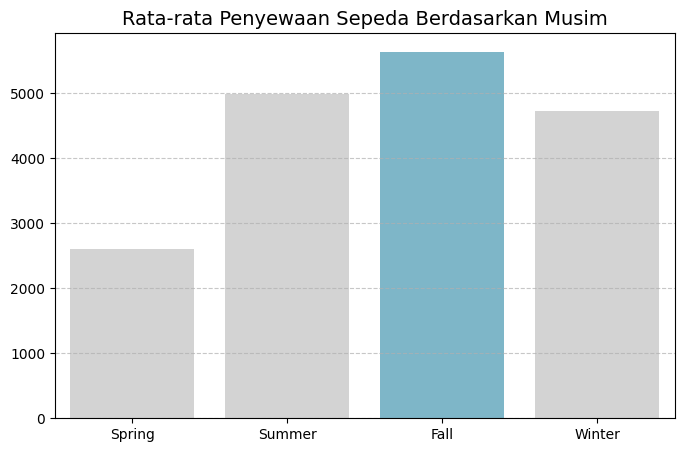

In [26]:
seasonal_usage = df_day.groupby("season")["cnt"].mean().reset_index()

# Mapping label musim sesuai dataset
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
seasonal_usage["season"] = seasonal_usage["season"].map(season_labels)

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_usage, x="season", y="cnt", hue="season", palette=colors)

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), dengan rata-rata sekitar 5644 penyewaan per hari.
- Penyewaan sepeda terendah terjadi pada musim semi (Spring), dengan rata-rata sekitar 2604 penyewaan per hari.

### Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

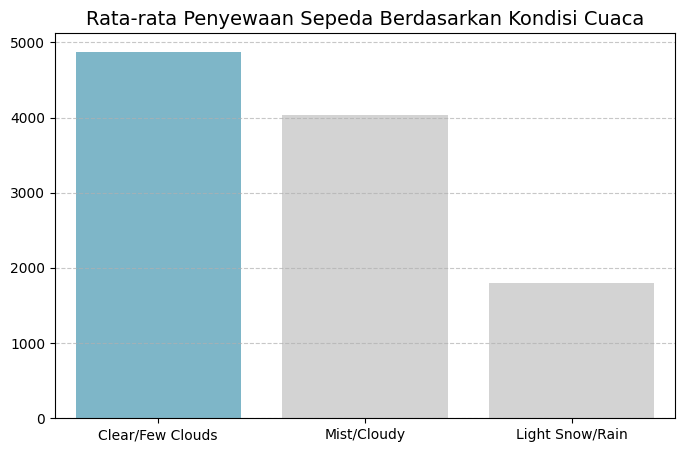

In [27]:
weather_usage = df_day.groupby("weathersit")["cnt"].mean().reset_index()

# Mapping label cuaca sesuai dataset
weather_labels = {
    1: "Clear/Few Clouds",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
weather_usage["weathersit"] = weather_usage["weathersit"].map(weather_labels)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_usage, x="weathersit", y="cnt", hue="weathersit", palette=colors)

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Cuaca yang paling mendukung penyewaan sepeda adalah Clear/Few Clouds, dengan rata-rata sekitar 4876 penyewaan per hari.
- Saat cuaca memburuk (misalnya Light Snow/Rain), penyewaan menurun drastis hingga 1803 per hari.

### Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?

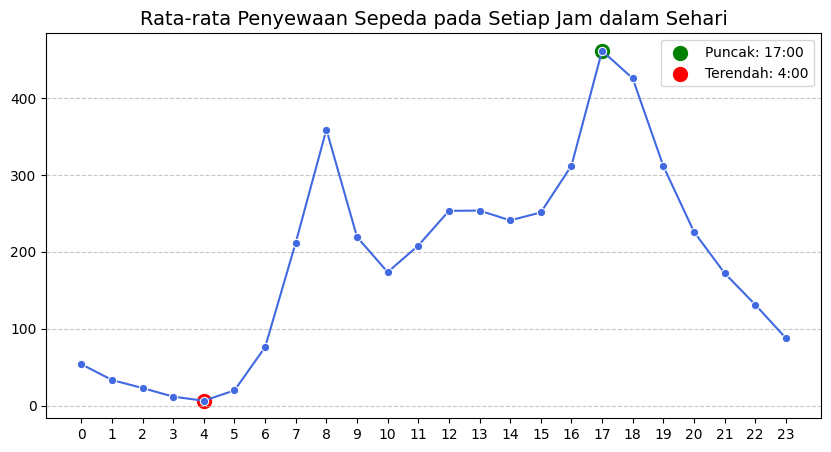

In [28]:
hourly_usage = df_hour.groupby("hr")["cnt"].mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_usage, x="hr", y="cnt", marker="o", linestyle="-", color="royalblue")

# Menambahkan titik puncak dan titik terendah
max_hour = hourly_usage.loc[hourly_usage["cnt"].idxmax()]
min_hour = hourly_usage.loc[hourly_usage["cnt"].idxmin()]
plt.scatter(max_hour["hr"], max_hour["cnt"], color="green", s=100, label=f"Puncak: {int(max_hour['hr'])}:00")
plt.scatter(min_hour["hr"], min_hour["cnt"], color="red", s=100, label=f"Terendah: {int(min_hour['hr'])}:00")

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda pada Setiap Jam dalam Sehari", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Jam dengan jumlah penyewaan tertinggi adalah sekitar pukul 17:00, dengan rata-rata sekitar 461 penyewaan per jam.
- Sebaliknya, jumlah penyewaan paling rendah terjadi pada pukul 4:00, hanya sekitar 6 penyewaan per jam.

## Conclusion

### Conclusion pertanyaan "Bagaimana pola penggunaan sepeda berdasarkan musim?"
- Musim gugur (fall) memiliki jumlah penyewaan sepeda tertinggi, dengan rata-rata 5.644 penyewaan per hari. Cuaca yang nyaman dan kondisi lingkungan yang mendukung kemungkinan besar menjadi faktor utama tingginya penggunaan sepeda di musim ini.

- Musim semi (spring) memiliki jumlah penyewaan sepeda terendah, dengan rata-rata 2.604 penyewaan per hari. Faktor seperti curah hujan yang lebih tinggi atau transisi dari musim dingin mungkin menyebabkan lebih sedikit orang menggunakan sepeda selama musim ini.

- Musim panas (summer) dan musim dingin (winter) memiliki jumlah penyewaan yang cukup tinggi, masing-masing dengan rata-rata 4.992 dan 4.728 penyewaan per hari. Musim panas cenderung mendukung aktivitas luar ruangan, sementara musim dingin mungkin memiliki penyewaan tinggi karena adanya pengguna reguler yang tetap menggunakan layanan meskipun cuaca lebih dingin.

- **Kesimpulan utama**: Pola penggunaan sepeda sangat dipengaruhi oleh musim. Dengan mengetahui bahwa musim semi memiliki jumlah penyewaan terendah, penyedia layanan bike-sharing dapat menerapkan strategi promosi atau program insentif untuk meningkatkan penggunaan sepeda pada musim tersebut. 😊

### Conclusion pertanyaan "Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?"
- Cuaca yang lebih cerah dan berawan ringan (kategori 1: Clear, Few clouds, Partly cloudy) memiliki jumlah penyewaan tertinggi.
Pengguna lebih cenderung menyewa sepeda saat kondisi cuaca mendukung, dengan rata-rata jumlah penyewaan yang lebih tinggi dibandingkan kondisi cuaca lainnya.

- Ketika cuaca berkabut atau hujan ringan (kategori 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), jumlah penyewaan sepeda mengalami penurunan.
Meskipun masih ada penyewaan, jumlahnya lebih sedikit dibandingkan saat cuaca cerah. Ini menunjukkan bahwa faktor visibilitas dan kenyamanan bersepeda mulai memengaruhi keputusan pengguna.

- Saat terjadi hujan deras atau salju (kategori 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), jumlah penyewaan sepeda turun drastis.
Kondisi ini menjadi penghalang besar bagi pengguna, menyebabkan jumlah penyewaan menjadi yang paling rendah.

- Dan ketika cuaca hujan deras atau hujan es (kategori 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), jumlah penyewaan sepeda tidak ada sama sekali

- **Kesimpulan utama**: Cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Semakin buruk cuaca, semakin rendah jumlah penyewaan sepeda. Oleh karena itu, penyedia layanan bike-sharing dapat mempertimbangkan strategi seperti diskon atau promosi pada hari-hari dengan cuaca kurang optimal untuk tetap menarik pelanggan.

### Conclusion pertanyaan "Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?"
- Penyewaan sepeda paling tinggi terjadi pada jam 17:00 - 18:00.
Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai moda transportasi utama saat pulang kerja atau sekolah. Lonjakan ini bisa dikaitkan dengan pola perjalanan pekerja dan pelajar yang pulang pada sore hari.

- Penyewaan sepeda juga meningkat pada pagi hari sekitar pukul 07:00 - 08:00.
Hal ini mengindikasikan bahwa banyak orang menggunakan layanan bike-sharing untuk pergi bekerja atau sekolah, terutama di jam sibuk pagi.

- Penyewaan sepeda paling rendah terjadi pada dini hari sekitar pukul 00:00 - 05:00.
Ini masuk akal karena pada jam-jam tersebut aktivitas kota cenderung sepi, dan sedikit orang yang bersepeda di waktu tersebut.

- **Kesimpulan utama**: Pola penyewaan sepeda mengikuti ritme aktivitas harian masyarakat, dengan lonjakan utama terjadi pada jam sibuk pagi dan sore. Layanan bike-sharing dapat meningkatkan stok sepeda dan pemeliharaan pada jam-jam tersebut untuk mengakomodasi lonjakan permintaan.